# Plot stream lines from a current field

In [1]:
import numpy as np
import xarray as xray
import pandas as pd
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
from datetime import datetime

from soda.utils.otherplot import axcolorbar

from soda.utils import othertime
#import cmocean
from soda.utils.maptools import plotmap
from soda.dataio.suntans.sunpy import Spatial

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['font.size']=14
mpl.rcParams['axes.labelsize']='large'

ImportError: cannot import name 'ugridutils'

In [92]:
def streamplot(sun, u, v, dx, xlims, ylims, **kwargs):
    """
    Create a quiverplot on a regular grid
    """
    # Create the grid
    x0, x1 = xlims[0], xlims[1]
    y0, y1 = ylims[0], ylims[1]
    X,Y = np.meshgrid( np.arange(x0, x1, dx),\
        np.arange(y0,y1, dx))

    # Interpolate
    ug = sun.interpolate(u, X, Y)
    vg = sun.interpolate(v, X, Y)
    
    speed = np.abs(ug+1j*vg)
    lw = 3*speed / speed.max()
    
    qq = plt.streamplot(X, Y, ug, vg, \
        linewidth=lw, 
        color= 'k',
        **kwargs)

    return qq


In [112]:
# SUNTANS harmonics folder
runfolder =  '../SCENARIOS/OUTPUT_TimorSea_2k_tri/'
#ncfile = '%s/TimorSea_15_5k_200*_surface.nc'%runfolder
ncfile = '%s/TimorSea_15_2k_20*_surface.nc'%runfolder

#cmap = cmocean.cm.amp
cmap = 'Spectral_r'

# Depth plotting
basedir = r'/home/suntans/Share/ScottReef/DATA'
#basedir = r'/group/pawsey0106/mrayson/DATA'
bathyfile = r'%s/BATHYMETRY/ETOPO1/ETOPO1_Bed.nc'%basedir
#bathylevs= [-1000.,-100.]
bathylevs= [100.,1000.]

#figfile = '../../FIGURES/TimorSea_SUNTANS_TideComparison'


clevs = np.arange(24, 32., 0.5)



klayer = [0]

dx = 0.025

coastfile = r'%s/COAST/GSHHS_shp/i/GSHHS_i_L1.shp'%basedir


#xlims = [107.5,142.5]
#ylims = [-25.0,-5.0]
xlims = [115., 130.]
ylims = [ -17, -8.]
#######

In [113]:
# open the bathy
dsz = xray.open_dataset(bathyfile)

# Bathymetry plotting function
def plot_bathy():
    #plot_skill()
    #xlims = [da.lon.min(),da.lon.max()]
    #ylims = [da.lat.min(),da.lat.max()]
    z = dsz.topo.sel(lon=slice(xlims[0],xlims[1]), lat=slice(ylims[1],ylims[0]))
    plt.contour(z.lon.values, z.lat.values, z.values,\
        bathylevs,
        linewidths=0.3,
        linestyles='-', colors='k')

In [114]:
# Create an output grid
x = np.arange(xlims[0],xlims[1],dx)
y = np.arange(ylims[0],ylims[1],dx)
X,Y = np.meshgrid(x,y)

In [115]:
# Load the suntans object
sun = Spatial(ncfile, projstr='merc', klayer=klayer)

# Convert the suntans coordinates to lat/lon
sun.xp, sun.yp = sun.to_latlon(sun.xp, sun.yp)
sun.xv, sun.yv = sun.to_latlon(sun.xv, sun.yv)
sun.xy = sun.cellxy(sun.xp, sun.yp)

Loading: ../SCENARIOS/OUTPUT_TimorSea_2k_tri//TimorSea_15_2k_20*_surface.nc


In [116]:
tstart = '20090821.0000'
tstart = '20090821.0600'

tstart = '20100121.0600'

sun.tstep = [sun.getTstep(tstart, tstart)[0]]
print 'tstep ', sun.tstep


print 'Loading uc...'
u = sun.loadData(variable='uc')
print 'Loading vc...'
v = sun.loadData(variable='vc')

print 'Loading temp...'
temp = sun.loadData(variable='temp')

speed = np.abs(u+1j*v)

tstep  [4163]
Loading uc...
Loading vc...
Loading temp...


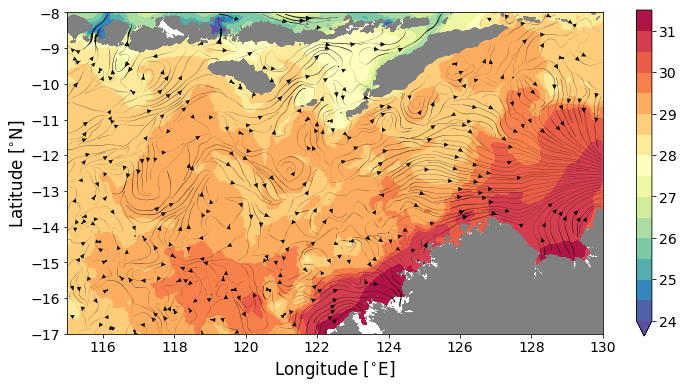

In [120]:
fig = plt.figure(figsize=(12,6))
ax=plt.subplot(111)

sun.clims = [clevs[0], clevs[-1]]
#sun.plot(z=temp,xlims=xlims, ylims=ylims, cmap=cmap)
    #plt.colorbar(sun.patches)
cf = sun.contourf(z=temp, clevs=clevs, xlims=xlims, ylims=ylims,\
        colorbar=True, cmap=cmap,\
        extend='min', titlestr='')

ss = 6 # subsample interval for vectors
scalefac = 50.
dxvec = 0.05 #  degrees'

plotmap(coastfile, fieldname=None)

qq = streamplot(sun, u, v, dxvec, xlims, ylims, \
        density=4,\
        cmap='Spectral_r',
        #color='k',\
        #maxlength=0.4,\
        )

ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_aspect('equal')

plt.ylabel('Latitude [$^{\circ}$N]')
plt.xlabel('Longitude [$^{\circ}$E]')

plt.savefig('../FIGURES/ExampleStreamlines_%s.png'%tstart, dpi=150)